In [3]:
!pip install beyond



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.2/133.2 kB 1.5 MB/s eta 0:00:00

  Preparing metadata (setup.py) ... done




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.1/232.1 kB 6.1 MB/s eta 0:00:00



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 4.4 MB/s eta 0:00:00




  Created wheel for beyond: filename=beyond-0.7.5-py3-none-any.whl size=153699 sha256=94b94ce8abb44a5eda7d31ee883ebe5941caaa918a9ca79b9f954200863a52e0

  Stored in directory: /root/.cache/pip/wheels/ec/64/43/3a266b18dc9fd0b393003100e9d09bcbe8a6dc0aac31522eae

Successfully built beyond




Pass for Satellite: STARLINK-30543 2023-11-04T05:25:47.772568 UTC 2023-11-04T05:33:18.527194 UTC

Pass for Satellite: STARLINK-30543 2023-11-04T06:59:57.408350 UTC 2023-11-04T07:07:32.002826 UTC


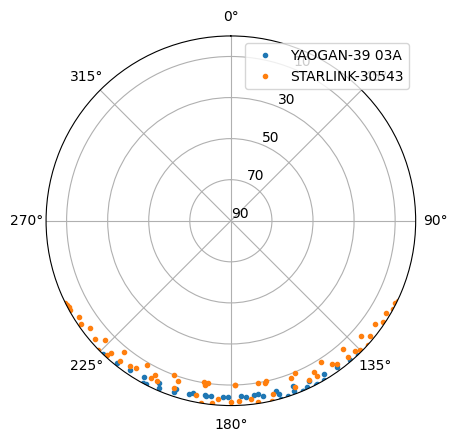

In [14]:
import sys
import numpy as np
import matplotlib.pyplot as plt
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.dates import Date, timedelta

# Define TLEs for the satellites you want to track
tle1 = Tle("""YAOGAN-39 03A
1 57986U 23152A   23306.06713297 -.00051979  00000+0 -21043-2 0  9991
2 57986  34.9920 178.2878 0004020 185.1588 324.9099 15.24047542  4270""")
tle2 = Tle("""STARLINK-30543
1 57996U 23153F   23304.25291422  .00156220  00000+0  55690-3 0  9992
2 57996  42.9988  74.2697 0003284 335.3161  24.7556 15.87673407  5329""")
# Add more TLEs as needed

# Create a list of TLEs
tle_list = [tle1, tle2]  # Add more TLEs to the list

# Create a station from which to compute the pass
station = create_station('Norwich', (52.6, 1.19, 0))

# Create lists to store azimuths and elevations for each satellite
azims_list = []
elevs_list = []

for tle in tle_list:
    orbit = tle.orbit()

    azims = []
    elevs = []

    start = None
    end = None
    max = max

    for orb in station.visibility(orbit, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
        elev = np.degrees(orb.phi)
        azim = np.degrees(-orb.theta) % 360

        azims.append(azim)
        elevs.append(90 - elev)

        r = orb.r / 1000.

        if orb.event is not None:
            if orb.event.info == 'AOS':
                start = orb.date
            if orb.event.info == 'MAX':
                max = elev

            if orb.event.info == 'LOS':
                end = orb.date
                if max >= 10:
                    print("Pass for Satellite: %s %s %s" % (tle.name, start, end))

    azims_list.append(azims)
    elevs_list.append(elevs)

# Plot the ground tracks for each satellite on the same polar plot
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')

for i in range(len(tle_list)):
    plt.plot(np.radians(azims_list[i]), elevs_list[i], '.', label=tle_list[i].name)

ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)
plt.legend(loc='best')
plt.show()


AOS 0 Norwich NOAA 15 [B]  2023-11-03T22:05:53.904666  277.91    0.00    3334.59

           NOAA 15 [B]  2023-11-03T22:07:00.401500  286.53    0.45    3287.05

LOS 0 Norwich NOAA 15 [B]  2023-11-03T22:08:58.715935  301.93   -0.00    3341.64

AOS 0 Norwich NOAA 15 [B]  2023-11-04T06:47:16.091779   27.91    0.00    3347.65

           NOAA 15 [B]  2023-11-04T06:49:00.401500   37.65    5.07    2828.23

           NOAA 15 [B]  2023-11-04T06:51:00.401500   53.82   10.89    2345.91

           NOAA 15 [B]  2023-11-04T06:53:00.401500   76.58   14.85    2080.26

MAX Norwich NOAA 15 [B]  2023-11-04T06:53:43.860788   85.95   15.20    2057.29

           NOAA 15 [B]  2023-11-04T06:55:00.401500  102.21   14.12    2120.22

           NOAA 15 [B]  2023-11-04T06:57:00.401500  123.36    9.29    2451.55

           NOAA 15 [B]  2023-11-04T06:59:00.401500  137.93    3.27    2975.60

LOS 0 Norwich NOAA 15 [B]  2023-11-04T07:00:07.119301  143.84   -0.00    3316.20

AOS 0 Norwich NOAA 15 [B]  2023-11-04T0

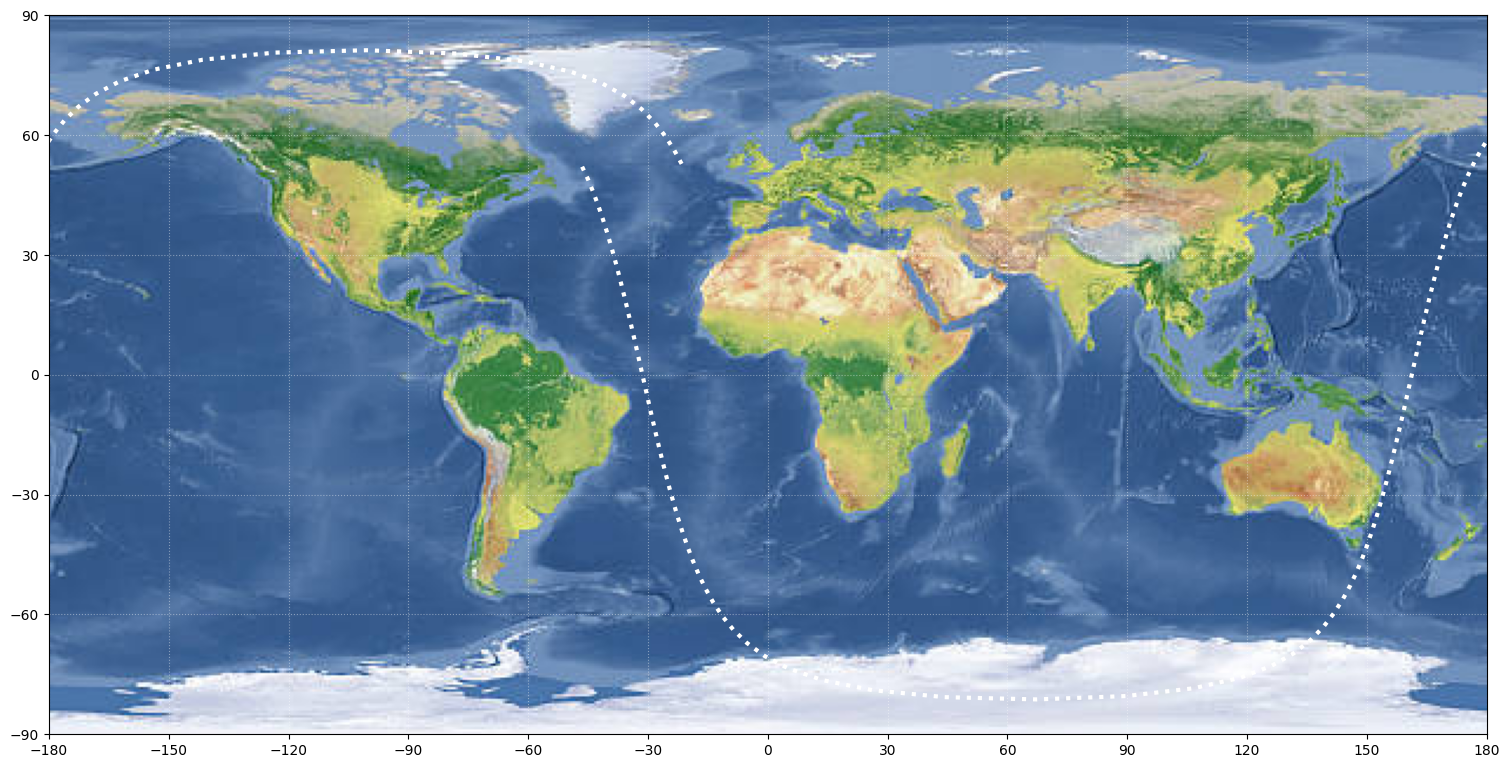

-21.587488222812564 52.82266365708844

-5.766995033363271 0.11654452901140364

Pass: 2023-11-04T06:47:03.681305 UTC 15.494427045819174 2023-11-04T06:59:58.442945 UTC

Pass: 2023-11-04T08:26:25.608251 UTC 84.30107502602127 2023-11-04T08:41:45.932730 UTC

Pass: 2023-11-04T10:06:33.759851 UTC 21.201344268402362 2023-11-04T10:20:01.166978 UTC

Pass: 2023-11-04T16:36:16.395927 UTC 10.478962689252679 2023-11-04T16:47:27.205485 UTC

Pass: 2023-11-04T18:12:57.653296 UTC 42.84624078092315 2023-11-04T18:27:47.730544 UTC

Pass: 2023-11-04T19:52:49.523914 UTC 36.564251127335055 2023-11-04T20:07:39.267308 UTC


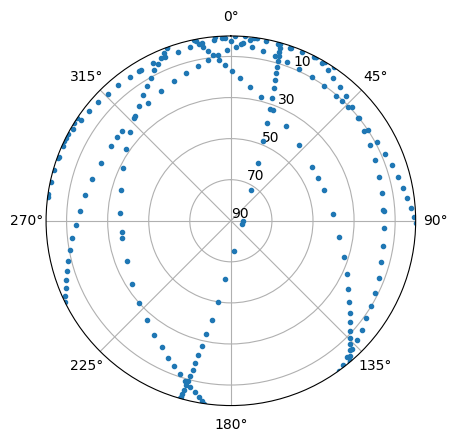

In [12]:
#!/usr/bin/env python
# coding: utf-8

# In[6]:


import numpy as np
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.dates import Date, timedelta


# Parse TLE
tle = Tle("""NOAA 15 [B]
1 25338U 98030A   20205.85092036  .00000065  00000-0  45627-4 0  9992
2 25338  98.7149 230.7131 0010993 151.5401 208.6381 14.25980908154168""")

# Create a station from which to compute the pass
station = create_station('Norwich', (52, 1, 0))

counter = 0

for orb in station.visibility(tle.orbit(), start=Date.now(), stop=timedelta(days=2), step=timedelta(minutes=2), events=True):

    # As all angles are given in radians,
    # there is some conversion to do
    azim = -np.degrees(orb.theta) % 360
    elev = np.degrees(orb.phi)
    r = orb.r / 1000.

    print("{event:10} {tle.name}  {date:%Y-%m-%dT%H:%M:%S.%f} {azim:7.2f} {elev:7.2f} {r:10.2f}".format(
        date=orb.date, r=r, azim=azim, elev=elev,
        tle=tle, event=orb.event if orb.event is not None else ""
    ))

    # Stop at the end of the first pass
    if orb.event and orb.event.info == "LOS":
        counter += 1
        if counter >= 5:
            break


# In[7]:



import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from beyond.io.tle import Tle
from beyond.dates import Date, timedelta


# Parsing of TLE
tle = Tle("""NOAA 15 [B]
1 25338U 98030A   20191.81750536  .00000057  00000-0  42639-4 0  9999
2 25338  98.7153 216.7534 0010156 191.4103 168.6848 14.25977849152168""")

# Create a station from which to compute the pass
# Conversion into `Orbit` object
orb = tle.orbit()

# Tables containing the positions of the ground track
latitudes, longitudes = [], []
prev_lon, prev_lat = None, None

period = orb.infos.period

#start = orb.date - period
start = Date.now()
stop = 1 * period
step = period / 100

for point in orb.ephemeris(start=start, stop=stop, step=step):

    # Conversion to earth rotating frame
    point.frame = 'ITRF'

    # Conversion from cartesian to spherical coordinates (range, latitude, longitude)
    point.form = 'spherical'

    # Conversion from radians to degrees
    lon, lat = np.degrees(point[1:3])

    # Creation of multiple segments in order to not have a ground track
    # doing impossible paths
    if prev_lon is None:
        lons = []
        lats = []
        longitudes.append(lons)
        latitudes.append(lats)
    elif orb.i < np.pi /2 and (np.sign(prev_lon) == 1 and np.sign(lon) == -1):
        lons.append(lon + 360)
        lats.append(lat)
        lons = [prev_lon - 360]
        lats = [prev_lat]
        longitudes.append(lons)
        latitudes.append(lats)
    elif orb.i > np.pi/2 and (np.sign(prev_lon) == -1 and np.sign(lon) == 1):
        lons.append(lon - 360)
        lats.append(lat)
        lons = [prev_lon + 360]
        lats = [prev_lat]
        longitudes.append(lons)
        latitudes.append(lats)

    lons.append(lon)
    lats.append(lat)
    prev_lon = lon
    prev_lat = lat

img = "/content/sample_data/istockphoto-182058785-612x612.jpg"

im = plt.imread(img)
plt.figure(figsize=(15.2, 8.2))
plt.imshow(im, extent=[-180, 180, -90, 90])

for lons, lats in zip(longitudes, latitudes):
    plt.plot(lons, lats, 'w', linestyle=":", linewidth=3)

torb1 = orb.copy(frame='ITRF', form='spherical').propagate(start)
lon, lat = np.degrees(torb1[1:3])
#torb = np.degrees(orb.ephemeris(start=start)[0][1:3])
#lon, lat = np.degrees(orb.copy(frame='ITRF', form='spherical')[1:3])
plt.plot([lon], [lat], 'ro')

#lon, lat = np.degrees(orb.copy(frame='ITRF', form='spherical')[1:3])
#plt.plot([lon], [lat], 'ro')
dir(plt)

#plt.xlim([-20, 20])
#plt.ylim([30, 70])
plt.xlim([-180, 180])
plt.ylim([-90, 90])

plt.grid(True, color='r', linestyle=":", alpha=0.4)
#plt.xticks(range(-20, 20, 2))
#plt.yticks(range(30, 70, 2))
plt.xticks(range(-180, 181, 30))
plt.yticks(range(-90, 91, 30))
plt.tight_layout()

#print(plt.type())
print(dir(plt.axis()))

#plt.axes['bottom'].set_color('#dddddd')
#plt.Axes.spines['top'].set_color('#dddddd')
#plt.Axes.spines['right'].set_color('red')
#plt.Axes.spines['left'].set_color('red')

plt.show()


# In[8]:


torb1 = orb.propagate(start).copy(frame='ITRF', form='spherical')
lon, lat = np.degrees(torb1[1:3])
print("%s %s" % (lon, lat))

lon, lat = np.degrees(orb.copy(frame='ITRF', form='spherical')[1:3])
print("%s %s" % (lon, lat))


# In[ ]:


orb.date


# In[9]:


#!/usr/bin/env python

import sys
import numpy as np
import matplotlib.pyplot as plt

from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


tle = Tle("""NOAA 15 [B]
1 25338U 98030A   20205.85092036  .00000065  00000-0  45627-4 0  9992
2 25338  98.7149 230.7131 0010993 151.5401 208.6381 14.25980908154168""")

# Create a station from which to compute the pass
station = create_station('Norwich', (52.6, 1.19, 0))
azims, elevs = [], []

orbit = tle.orbit()

start = None
end = None
max = max

for orb in station.visibility(orbit, start=Date.now(), stop=timedelta(hours=24), step=timedelta(seconds=30), events=True):
    elev = np.degrees(orb.phi)
    # Radians are counterclockwise and azimuth is clockwise
    azim = np.degrees(-orb.theta) % 360

    # Archive for plotting
    azims.append(azim)
    # Matplotlib actually force 0 to be at the center of the polar plot,
    # so we trick it by inverting the values
    elevs.append(90 - elev)

    r = orb.r / 1000.

    if orb.event is not None:
        if orb.event.info =='AOS':
            start = orb.date
        if orb.event.info  == 'MAX':
            max = elev

        if orb.event.info  == 'LOS':

            end = orb.date
            if max >= 10:
                print("Pass: %s %s %s" % (start, max, end))

    #print("{event:7} {orb.date:%H:%M:%S} {azim:7.2f} {elev:7.2f} {r:10.2f} {orb.r_dot:10.2f}".format(
    #    orb=orb, r=r, azim=azim, elev=elev, event=orb.event.info if orb.event is not None else ""
    #))

    #print (orb.event.info)

    #if orb.event and orb.event.info.startswith("LOS"):
    #    # We stop at the end of the first pass
    #    print()
    #    break

plt.figure()
ax = plt.subplot(111, projection='polar')
ax.set_theta_direction(-1)
ax.set_theta_zero_location('N')
plt.plot(np.radians(azims), elevs, '.')
ax.set_yticks(range(0, 90, 20))
ax.set_yticklabels(map(str, range(90, 0, -20)))
ax.set_rmax(90)


plt.show()

In [7]:


# In[2]:


import requests
import numpy as np
from beyond.dates import Date, timedelta
from beyond.io.tle import Tle
from beyond.frames import create_station
from beyond.config import config


# In[3]:


celestrak_noaa =  "https://www.celestrak.com/NORAD/elements/noaa.txt"

data = requests.get(celestrak_noaa)
data = data.content.decode("utf-8")
rows = data.splitlines()

tles = {}
first = None
second = None
last = None
for row in rows:
    if not first:
        first = row
    elif not second:
        second = row
    else:
        last = row
        name = (first.split("[")[0]).strip()
        tles[name] = """%s
%s
%s""" % (first, second, last)
        first = None
        second= None



# In[4]:


tles['NOAA 15']


# In[5]:


tle = Tle(tles['NOAA 15'])


# In[6]:


station = create_station('Norwich', (52.5, 1.2, 0)) # obfuscated slightly


# In[7]:


def predictions(tle, station, hours):
    azims, elevs = [], []

    orbit = tle.orbit()

    start = None
    end = None
    max_alt = None

    for orb in station.visibility(orbit, start=Date.now(), stop=timedelta(hours=hours), step=timedelta(seconds=30), events=True):
        elev = np.degrees(orb.phi)
        # Radians are counterclockwise and azimuth is clockwise
        azim = np.degrees(-orb.theta) % 360

        # Archive for plotting
        azims.append(azim)
        # Matplotlib actually force 0 to be at the center of the polar plot,
        # so we trick it by inverting the values
        elevs.append(90 - elev)

        #r = orb.r / 1000.

        if orb.event is not None:
            if orb.event.info =='AOS': # aquisition of signal
                start = orb.date
            if orb.event.info  == 'MAX':
                max_alt = elev

            if orb.event.info  == 'LOS': # loss of signal

                end = orb.date
                if max_alt and max_alt >= 10:
                    print("Pass: %s %s %s" % (start, max_alt, end))
                    start = None
                    end = None
                    max_alt = None




# In[8]:


predictions(Tle(tles['NOAA 19']), station, 24)


# In[9]:


predictions(Tle(tles['NOAA 18']), station, 24)


# In[10]:


predictions(Tle(tles['NOAA 15']), station, 24)


# In[ ]:


Pass: 2023-11-03T21:58:12.861019 UTC 11.533071955930886 2023-11-03T22:10:30.719177 UTC

Pass: 2023-11-04T08:30:18.832293 UTC 35.48824186481552 2023-11-04T08:45:29.288389 UTC

Pass: 2023-11-04T10:11:02.558755 UTC 45.98752915649984 2023-11-04T10:26:21.275357 UTC

Pass: 2023-11-04T11:52:12.456550 UTC 11.675320631170718 2023-11-04T12:04:01.809733 UTC

Pass: 2023-11-04T18:23:09.349717 UTC 24.155207518677056 2023-11-04T18:37:22.063579 UTC

Pass: 2023-11-04T20:02:28.533286 UTC 76.97573276297372 2023-11-04T20:18:21.117578 UTC

Pass: 2023-11-03T20:28:52.902283 UTC 32.46607760065546 2023-11-03T20:43:38.239544 UTC

Pass: 2023-11-03T22:08:57.509463 UTC 52.39509342402307 2023-11-03T22:24:31.212587 UTC

Pass: 2023-11-04T10:24:11.788230 UTC 43.969636566657165 2023-11-04T10:39:44.478605 UTC

Pass: 2023-11-04T12:05:01.276520 UTC 38.296704955194556 2023-11-04T12:20:10.300678 UTC

Pass: 2023-11-04T06:17:10.352911 UTC 15.889859242084121 2023-11-04T06:30:08.878360 UTC

Pass: 2023-11-04T07:56:33.368003 UTC 

In [15]:
! pip install poliastro




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.7/162.7 kB 2.2 MB/s eta 0:00:00




     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 47.3 MB/s eta 0:00:00

















     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 888.9/888.9 kB 51.0 MB/s eta 0:00:00






















In [17]:
!pip uninstall poliastro
!pip install poliastro


Found existing installation: poliastro 0.17.0

Uninstalling poliastro-0.17.0:

  Would remove:

    /usr/local/lib/python3.10/dist-packages/poliastro-0.17.0.dist-info/*

    /usr/local/lib/python3.10/dist-packages/poliastro/*

Proceed (Y/n)? Y

  Successfully uninstalled poliastro-0.17.0


  Using cached poliastro-0.17.0-py3-none-any.whl (162 kB)





































